# <span style="color:green"> Numerical Simulation Laboratory </span>
## <span style="color:brown"> Python Exercise 11 </span>
## <span style="color:orange"> Keras - Neural Network regression </span>

### Overview 

In this notebook our task will be to perform machine learning regression on noisy data with a Neural Network (NN).

We will explore how the ability to fit depends on the structure of the NN. The goal is also to build intuition about why prediction is difficult.

### The Prediction Problem

Consider a probabilistic process that gives rise to labeled data $(x,y)$. The data is generated by drawing samples from the equation

$$
    y_i= f(x_i) + \eta_i,
$$

where $f(x_i)$ is some fixed, but (possibly unknown) function, and $\eta_i$ is a Gaussian, uncorrelate noise variable such that

$$
\langle \eta_i \rangle=0 \\
\langle \eta_i \eta_j \rangle = \delta_{ij} \sigma
$$

We will refer to the $f(x_i)$ as the **true features** used to generate the data. 

To make predictions, we will consider a NN that depends on its parameters, weights and biases. The functions that the NN can model respresent the **model class** that we are using to try to model the data and make predictions.

To learn the parameters of the NN, we will train our models on a **training data set** and then test the effectiveness of the NN on a *different* dataset, the **validation data set**. The reason we must divide our data into a training and test dataset is that the point of machine learning is to make accurate predictions about new data we have not seen.

To measure our ability to predict, we will learn our parameters by fitting our training dataset and then making predictions on our test data set. One common measure of predictive  performance of our algorithm is to compare the predictions,$\{y_j^\mathrm{pred}\}$, to the true values $\{y_j\}$. A commonly employed measure for this is the sum of the mean square-error (MSE) on the test set:
$$
MSE= \frac{1}{N_\mathrm{test}}\sum_{j=1}^{N_\mathrm{test}} (y_j^\mathrm{pred}-y_j)^2
$$

We will try to get a qualitative picture by examining plots on validation and training data.

### Linear fit

We start by considering the very simple case:
$$
f(x)=2x+1
$$

Let's start defining the parameters of an ideal linear function which we are going to predict through a neural network regression

In [254]:
# target parameters of f(x) = m*x + b
m = 2 # slope
b = 1 # intersect

Now let's generate a set of input data which will slightly deviate from our ideal behaviour using a random noise (that actually is set to zero):

In [255]:
import numpy as np

# generate training inputs
np.random.seed(0)
x_train = np.random.uniform(-1, 1, 500)
x_valid = np.random.uniform(-1, 1, 50)
x_valid.sort()
y_target = m * x_valid + b # ideal (target) linear function

sigma = 0.3 # noise standard deviation, for the moment it is absent
y_train = np.random.normal(m * x_train + b, sigma) # actual measures from which we want to guess regression parameters
y_valid = np.random.normal(m * x_valid + b, sigma)

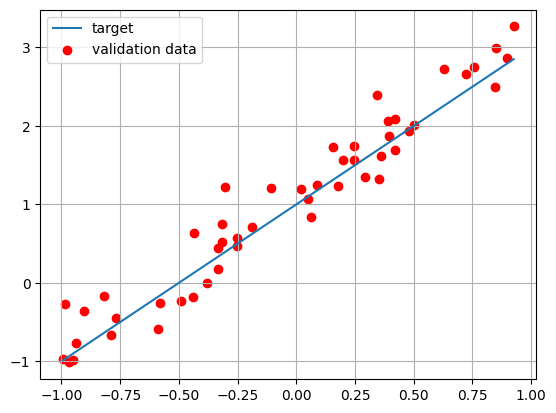

In [256]:
# plot validation and target dataset
import matplotlib.pyplot as plt
plt.plot(x_valid, y_target, label='target')
plt.scatter(x_valid, y_valid, color='r', label='validation data')
plt.legend()
plt.grid(True)
plt.show()

If you remember how a single node of a neural network works, you can easily spot that **just a single neuron can make the job**. So let's start using a simple Sequential model with just one layer on one neuron only!

In [257]:
# compose the NN model
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras import backend as K
from tensorflow.keras.utils import get_custom_objects

model = tf.keras.Sequential()
model.add(Dense(1, input_shape=(1,)))

# compile the model choosing optimizer, loss and metrics objects
model.compile(optimizer='sgd', loss='mse', metrics=['mse'])

In [258]:
# get a summary of our composed model
model.summary()

Model: "sequential_57"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_181 (Dense)           (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


We are now going to train our model, that is we feed the neuron with the set of training pair x, y_train from which the optimizer will find the best weights to minimize the Mean Square Error loss function (out linear regression function).

In [259]:
# fit the model using training dataset
# over 10 epochs of 32 batch size each
# report training progress against validation data
history = model.fit(x=x_train, y=y_train, 
          batch_size=32, epochs=30,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(x_valid, y_valid))

Epoch 1/30
16/16 [==============================] - 2s 30ms/step - loss: 1.9791 - mse: 1.9791 - val_loss: 1.6170 - val_mse: 1.6170
Epoch 2/30
16/16 [==============================] - 0s 11ms/step - loss: 1.4169 - mse: 1.4169 - val_loss: 1.1805 - val_mse: 1.1805
Epoch 3/30
16/16 [==============================] - 0s 12ms/step - loss: 1.0537 - mse: 1.0537 - val_loss: 0.8988 - val_mse: 0.8988
Epoch 4/30
16/16 [==============================] - 0s 12ms/step - loss: 0.8134 - mse: 0.8134 - val_loss: 0.7039 - val_mse: 0.7039
Epoch 5/30
16/16 [==============================] - 0s 10ms/step - loss: 0.6451 - mse: 0.6451 - val_loss: 0.5618 - val_mse: 0.5618
Epoch 6/30
16/16 [==============================] - 0s 10ms/step - loss: 0.5210 - mse: 0.5210 - val_loss: 0.4572 - val_mse: 0.4572
Epoch 7/30
16/16 [==============================] - 0s 10ms/step - loss: 0.4283 - mse: 0.4283 - val_loss: 0.3800 - val_mse: 0.3800
Epoch 8/30
16/16 [==============================] - 0s 10ms/step - loss: 0.3587 - m

By looking at weights and biases we can see if the linear fit was successfull: $w_1$ represents the angular coefficient, $b$ the intercept.

In [260]:
# return weights and biases
model.get_weights()

[array([[1.9567652]], dtype=float32), array([0.9665648], dtype=float32)]

In [261]:
# evaluate model
score = model.evaluate(x_valid, y_valid, batch_size=32, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

2/2 [==============================] - 0s 16ms/step - loss: 0.1007 - mse: 0.1007

Test loss: 0.1006559357047081
Test accuracy: 0.1006559357047081


In [262]:
# evaluate model with the exact curve
score = model.evaluate(x_valid, y_target, batch_size=32, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

2/2 [==============================] - 0s 10ms/step - loss: 0.0016 - mse: 0.0016   

Test loss: 0.0015628448454663157
Test accuracy: 0.0015628448454663157


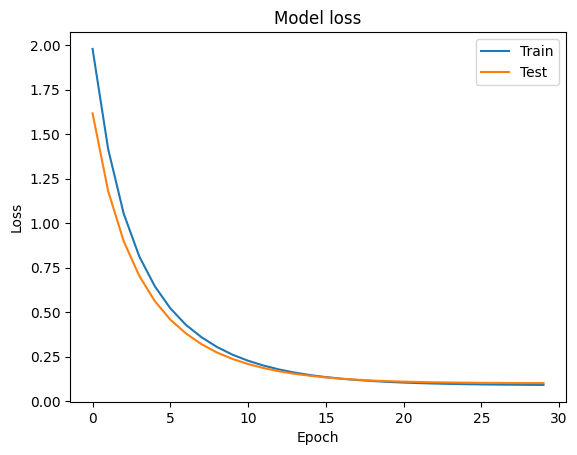

In [263]:
# look into training history
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.show()

4/4 [==============================] - 0s 5ms/step


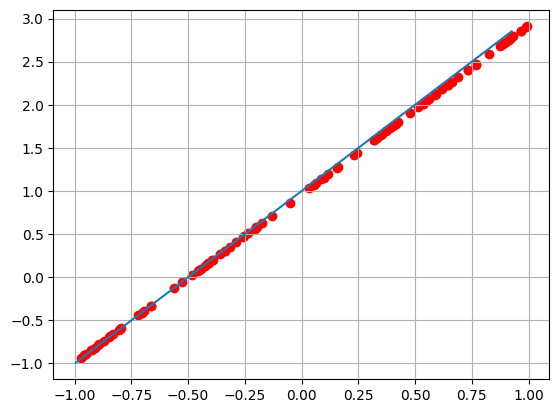

In [264]:
x_predicted = np.random.uniform(-1, 1, 100)
y_predicted = model.predict(x_predicted)
plt.scatter(x_predicted, y_predicted,color='r')
plt.plot(x_valid, y_target)
plt.grid(True)
plt.show()

### Exercise 11.1

In order to make practice with NN, explore how does the previous linear regression depend on the number of epochs, $N_{\mathrm{epochs}}$, the number of data points $N_{\mathrm{train}}$ and on the noise $\sigma$. Try to improve the previous result operating on these parameters.

In [265]:
# generate training inputs
np.random.seed(0)
x_train = np.random.uniform(-1, 1, 1000)
x_valid = np.random.uniform(-1, 1, 50)
x_valid.sort()
y_target = m * x_valid + b # ideal (target) linear function

sigma = 0.6 # noise standard deviation, for the moment it is absent
y_train = np.random.normal(m * x_train + b, sigma) # actual measures from which we want to guess regression parameters
y_valid = np.random.normal(m * x_valid + b, sigma)

In [266]:
model = tf.keras.Sequential()
model.add(Dense(1, input_shape=(1,)))

# compile the model choosing optimizer, loss and metrics objects
model.compile(optimizer='sgd', loss='mse', metrics=['mse'])

In [267]:
history = model.fit(x=x_train, y=y_train, 
          batch_size=32, epochs=30,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(x_valid, y_valid))

Epoch 1/30
32/32 [==============================] - 2s 27ms/step - loss: 3.5296 - mse: 3.5296 - val_loss: 2.9183 - val_mse: 2.9183
Epoch 2/30
32/32 [==============================] - 0s 10ms/step - loss: 2.2001 - mse: 2.2001 - val_loss: 1.9806 - val_mse: 1.9806
Epoch 3/30
32/32 [==============================] - 0s 15ms/step - loss: 1.4881 - mse: 1.4881 - val_loss: 1.4207 - val_mse: 1.4207
Epoch 4/30
32/32 [==============================] - 0s 7ms/step - loss: 1.0694 - mse: 1.0694 - val_loss: 1.0616 - val_mse: 1.0616
Epoch 5/30
32/32 [==============================] - 0s 8ms/step - loss: 0.8106 - mse: 0.8106 - val_loss: 0.8221 - val_mse: 0.8221
Epoch 6/30
32/32 [==============================] - 1s 16ms/step - loss: 0.6439 - mse: 0.6439 - val_loss: 0.6572 - val_mse: 0.6572
Epoch 7/30
32/32 [==============================] - 0s 7ms/step - loss: 0.5348 - mse: 0.5348 - val_loss: 0.5529 - val_mse: 0.5529
Epoch 8/30
32/32 [==============================] - 0s 7ms/step - loss: 0.4674 - mse: 

In [268]:
# return weights and biases
model.get_weights()

[array([[1.9711722]], dtype=float32), array([1.0149493], dtype=float32)]

In [269]:
score = model.evaluate(x_valid, y_target, batch_size=32, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

2/2 [==============================] - 0s 10ms/step - loss: 5.4972e-04 - mse: 5.4972e-04

Test loss: 0.0005497206002473831
Test accuracy: 0.0005497206002473831


In [270]:
# evaluate model
score = model.evaluate(x_valid, y_valid, batch_size=32, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

2/2 [==============================] - 0s 10ms/step - loss: 0.3029 - mse: 0.3029

Test loss: 0.3029351532459259
Test accuracy: 0.3029351532459259


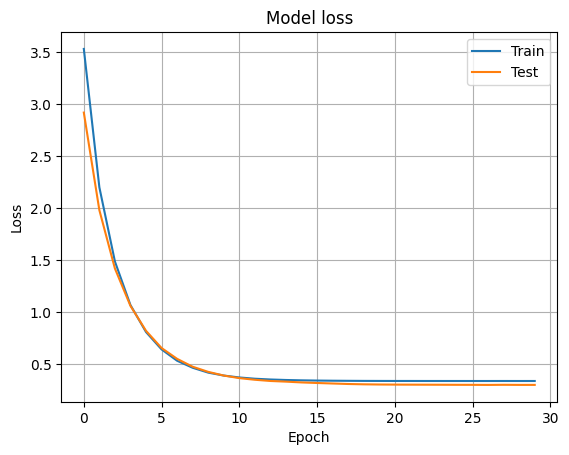

In [271]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.grid(True)
plt.show()

4/4 [==============================] - 0s 10ms/step


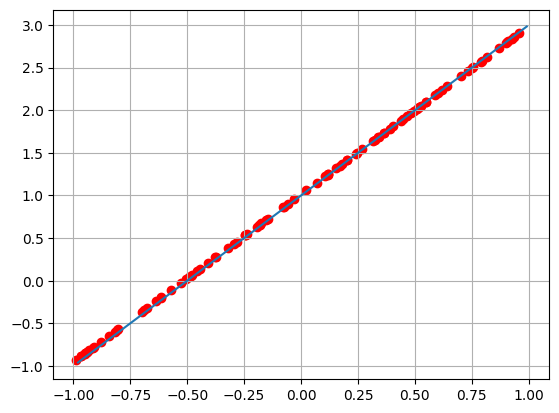

In [272]:
x_predicted = np.random.uniform(-1, 1, 100)
y_predicted = model.predict(x_predicted)
plt.scatter(x_predicted, y_predicted,color='r')
plt.plot(x_valid, y_target)
plt.grid(True)
plt.show()

Osserviamo che con l'aumentare del numero di $N_{train}$ ed $N_{epochs}$ aunmentiamo l'accuratezza del fit. Il primo perchè avendo più dati possiamo allenare maggiormerte la *NN*, analogamente la seconda indica il "tempo di allenamento" nel nostro caso questo numero è eccessivo: la nostra rete descrive molto bene i dati che ha a disposizione per l'allenamento ma fatà fatica per preddirre da dati mai visti.

Invece $\sigma$ aumenta la difficoltà del fit: con dispersioni maggiori la rete farà più fatica a fittare i dati.

### Exercise 11.2

Try to extend the model to obtain a reasonable fit of the following polynomial of order 3:

$$
f(x)=4-3x-2x^2+3x^3
$$
for $x \in [-1,1]$.

In order to make practice with NN, explore reasonable different choices for:

- the number of layers
- the number of neurons in each layer
- the activation function
- the optimizer
- the loss function
  
Make graphs comparing fits for different NNs.
Check your NN models by seeing how well your fits predict newly generated test data (including on data outside the range you fit. How well do your NN do on points in the range of $x$ where you trained the model? How about points outside the original training data set? 
Summarize what you have learned about the relationship between model complexity (number of parameters), goodness of fit on training data, and the ability to predict well.

In [302]:
a=3
b=-2
c=-3
d=4

# generate training inputs
np.random.seed(0)
x_train = np.random.uniform(-1, 1, 2500)
x_valid = np.random.uniform(-1, 1, 250)
x_valid.sort()
y_target = a*x_valid**3+b*x_valid**2+c * x_valid + d # ideal (target) linear function

sigma = 0.3 # noise standard deviation, for the moment it is absent
y_train = np.random.normal(a*x_train**3+b*x_train**2+c * x_train + d, sigma) # actual measures from which we want to guess regression parameters
y_valid = np.random.normal(a*x_valid**3+b*x_valid**2+c * x_valid + d, sigma)

model1 = tf.keras.Sequential([
    keras.layers.Dense(4,activation='tanh',input_shape=(1,)),
    keras.layers.Dense(4,activation='relu'),
    keras.layers.Dense(1)
])

# compile the model choosing optimizer, loss and metrics objects
model1.compile(optimizer='adam', loss='mse', metrics=['mse'])

history = model1.fit(x=x_train, y=y_train, 
          batch_size=32, epochs=50,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(x_valid, y_valid))

Epoch 1/50
79/79 [==============================] - 5s 17ms/step - loss: 11.4187 - mse: 11.4187 - val_loss: 9.4543 - val_mse: 9.4543
Epoch 2/50
79/79 [==============================] - 1s 13ms/step - loss: 7.6393 - mse: 7.6393 - val_loss: 5.7872 - val_mse: 5.7872
Epoch 3/50
79/79 [==============================] - 1s 12ms/step - loss: 4.0293 - mse: 4.0293 - val_loss: 2.6412 - val_mse: 2.6412
Epoch 4/50
79/79 [==============================] - 1s 11ms/step - loss: 1.6242 - mse: 1.6242 - val_loss: 0.9330 - val_mse: 0.9330
Epoch 5/50
79/79 [==============================] - 1s 11ms/step - loss: 0.5958 - mse: 0.5958 - val_loss: 0.3762 - val_mse: 0.3762
Epoch 6/50
79/79 [==============================] - 1s 11ms/step - loss: 0.3553 - mse: 0.3553 - val_loss: 0.2797 - val_mse: 0.2797
Epoch 7/50
79/79 [==============================] - 1s 12ms/step - loss: 0.3125 - mse: 0.3125 - val_loss: 0.2548 - val_mse: 0.2548
Epoch 8/50
79/79 [==============================] - 1s 17ms/step - loss: 0.2920 -

In [303]:
# evaluate model
score = model1.evaluate(x_valid, y_valid, batch_size=32, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

score = model1.evaluate(x_valid, y_target, batch_size=32, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

1/8 [==>...........................] - ETA: 0s - loss: 0.1454 - mse: 0.1454

8/8 [==============================] - 0s 6ms/step - loss: 0.1032 - mse: 0.1032

Test loss: 0.10324446856975555
Test accuracy: 0.10324446856975555
8/8 [==============================] - 0s 13ms/step - loss: 0.0172 - mse: 0.0172

Test loss: 0.01720324158668518
Test accuracy: 0.01720324158668518


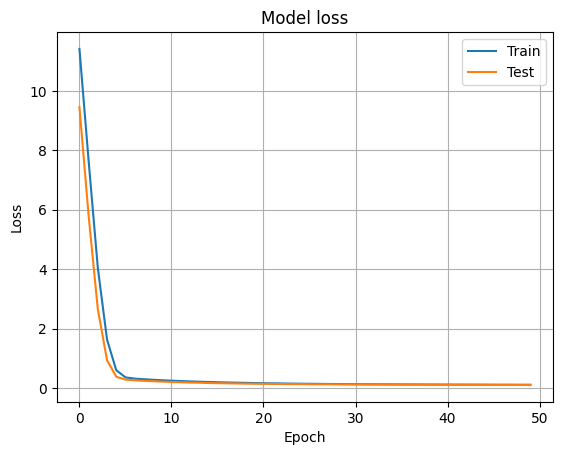

In [304]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.grid(True)
plt.show()

4/4 [==============================] - 0s 10ms/step


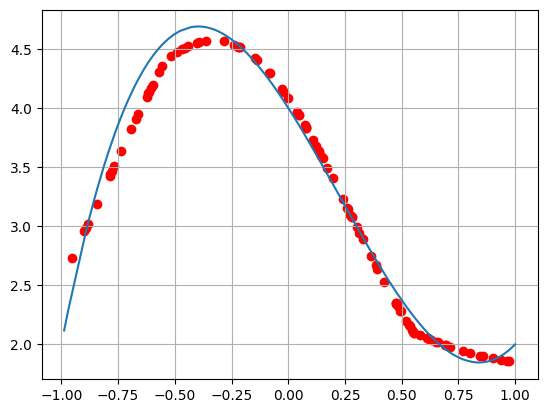

In [305]:
x_predicted = np.random.uniform(-1, 1, 100)
y_predicted = model1.predict(x_predicted)
plt.scatter(x_predicted, y_predicted,color='r')
plt.plot(x_valid, y_target)
plt.grid(True)
plt.show()

4/4 [==============================] - 0s 4ms/step


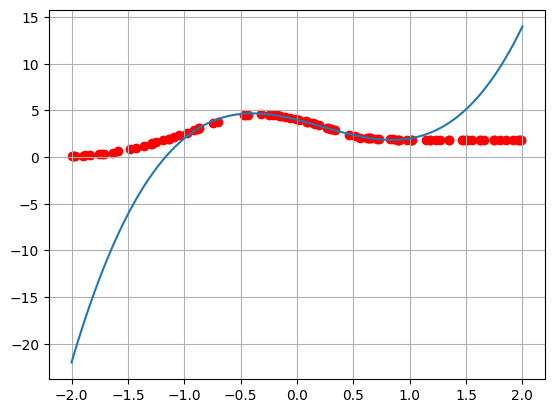

In [311]:
x_predicted = np.random.uniform(-2, 2, 100)
y_predicted = model1.predict(x_predicted)
plt.scatter(x_predicted, y_predicted,color='r')
x_valid=np.linspace(-2,2,100)
y_target=a*x_valid**3+b*x_valid**2+c*x_valid+d
plt.plot(x_valid, y_target)
plt.grid(True)
plt.show()

Cambiando i valori e i metodi abbiamo concluso che:
- Il fit è piu preciso aumentando il numero di neuroni.
- Aumentare il numero di layers aiuta notevolmente il fit e può diminuire il numero di neuroni per layer.
- Alcune funzioni di attivazione che fittano bene la funzione sono:
    - ELU
    - SELU
    - TanH
    - Soft Sign
    
    Mentre la RELU non è la migliore ma è l'unica che trova l'ultima salita.
- I metodi di ottimizzazione più utili sono ADAM e SGD.
- Le loss function che fittano al meglio sono MSE, MAE.

### Exercise 11.3
  
Try to extend the model to fit a simple trigonometric 2D function such as $f(x,y) = \sin(x^2+y^2)$ in the range $x \in [-3/2,3/2]$ and $y \in [-3/2,3/2]$.

Ideas to meditate on these exercises and judge your results can be found <a href=https://xkcd.com/2048/>here</a>

In [335]:
# generate training inputs
np.random.seed(0)
x_train = np.random.uniform(-1.5, 1.5, 2500)
y_train = np.random.uniform(-1.5, 1.5, 2500)

x_valid = np.random.uniform(-1.5, 1.5, 250)
y_valid = np.random.uniform(-1.5, 1.5, 250)

x_valid.sort()
y_valid.sort()

z_target = np.sin(x_valid**2+y_valid**2) # ideal (target) linear function

sigma = 0.3 # noise standard deviation
z_train = np.random.normal(np.sin(x_train**2+y_train**2),sigma) # actual measures from which we want to guess regression parameters
z_valid = np.random.normal(np.sin(x_valid**2+y_valid**2),sigma)

model2 = tf.keras.Sequential([
    keras.layers.Dense(40, activation='softsign', input_shape=(2,)),
    keras.layers.Dense(30, activation='softsign'),
    keras.layers.Dense(20, activation='softsign'),
    keras.layers.Dense(10, activation='softsign'),
    keras.layers.Dense(1)
])

# compile the model choosing optimizer, loss and metrics objects
model2.compile(optimizer='adam', loss='mse')

history = model2.fit(x=np.column_stack((x_train,y_train)), y=z_train, 
          batch_size=32, epochs=50,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(np.column_stack((x_valid,y_valid)), z_valid))


Epoch 1/50
79/79 [==============================] - 6s 19ms/step - loss: 0.3282 - val_loss: 0.3919
Epoch 2/50
79/79 [==============================] - 1s 13ms/step - loss: 0.2539 - val_loss: 0.3648
Epoch 3/50
79/79 [==============================] - 1s 12ms/step - loss: 0.2513 - val_loss: 0.3715
Epoch 4/50
79/79 [==============================] - 1s 14ms/step - loss: 0.2504 - val_loss: 0.3536
Epoch 5/50
79/79 [==============================] - 1s 12ms/step - loss: 0.2444 - val_loss: 0.3378
Epoch 6/50
79/79 [==============================] - 1s 14ms/step - loss: 0.2421 - val_loss: 0.3365
Epoch 7/50
79/79 [==============================] - 1s 13ms/step - loss: 0.2346 - val_loss: 0.3146
Epoch 8/50
79/79 [==============================] - 1s 13ms/step - loss: 0.2238 - val_loss: 0.2947
Epoch 9/50
79/79 [==============================] - 1s 11ms/step - loss: 0.2150 - val_loss: 0.2814
Epoch 10/50
79/79 [==============================] - 1s 16ms/step - loss: 0.2024 - val_loss: 0.2640
Epoch 11/

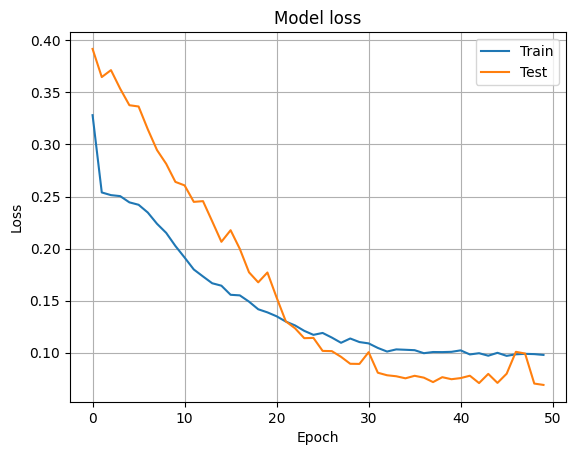

In [336]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.grid(True)
plt.show()

313/313 [==============================] - 3s 8ms/step


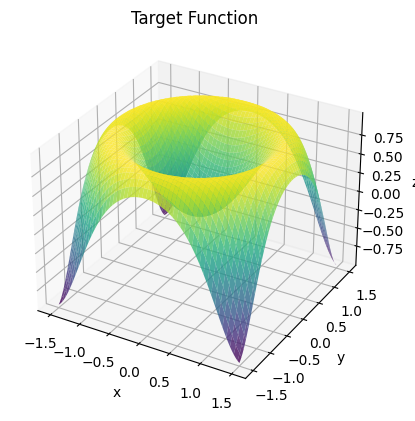

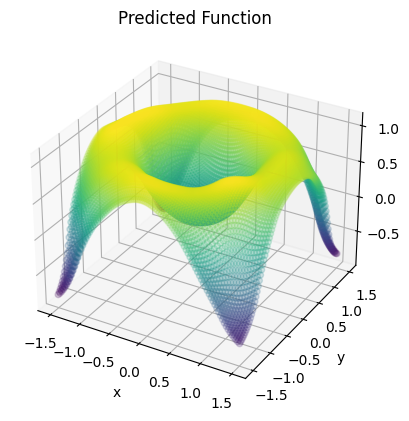

8/8 [==============================] - 0s 9ms/step - loss: 0.0689

Test loss: 0.06886153668165207


In [337]:
# Generate grid points to evaluate the function over the given range
x = np.linspace(-1.5, 1.5, 100)
y = np.linspace(-1.5, 1.5, 100)
x, y = np.meshgrid(x, y)
z = np.sin(x**2 + y**2)

# Flatten the grid points for prediction
x_flat = x.flatten()
y_flat = y.flatten()

# Predict the function values using the trained model2
z_pred = model2.predict(np.column_stack((x_flat, y_flat)))
z_pred = z_pred.reshape(x.shape)

# Plot the target function
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x, y, z, cmap='viridis', edgecolor='none', alpha=0.8)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_title('Target Function')
plt.show()

# Scatter plot of predicted points with color mapping
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
sc = ax.scatter(x_flat, y_flat, z_pred, c=z_pred, cmap='viridis', alpha= 0.2)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_title('Predicted Function')

## Add a colorbar to the plot
#cbar = fig.colorbar(sc)
#cbar.set_label('Predicted z')

plt.show()

# Evaluate the model2
score = model2.evaluate(np.column_stack((x_valid, y_valid)), z_valid, batch_size=32, verbose=1)
print()
print('Test loss:', score)